In [2]:
# mnist dataset
# import the nesecessary packages
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [5]:
# load the mnist dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [6]:
# normalize the data
x_train, x_test = x_train/255.0, x_test/255.0

In [8]:
# reshape the data for CNN
x_train_cnn = x_train.reshape(-1,28,28,1)
x_test_cnn = x_test.reshape(-1,28,28,1)

In [9]:
# one-hot encoding for ann and cnn in data
y_train_oh = to_categorical(y_train,10)
y_test_oh = to_categorical(y_test,10)

In [20]:
# Build the ANN model
ann_model = Sequential([
     # Flattening the input
    Flatten(input_shape=(28,28)), 
    # First hidden layer
    Dense(128, activation='relu'),
    # Second hidden layer  
    Dense(64, activation='relu'), 
    # Output layer with 10 neurons (for 10 classes)  
    Dense(10, activation='softmax') 
])

# Compile the model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the ANN model
ann_model.fit(x_train, y_train_oh, epochs=5, batch_size=32, validation_data=(x_test, y_test_oh))


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8807 - loss: 0.4166 - val_accuracy: 0.9626 - val_loss: 0.1274
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9686 - loss: 0.1047 - val_accuracy: 0.9693 - val_loss: 0.0983
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9784 - loss: 0.0693 - val_accuracy: 0.9650 - val_loss: 0.1130
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9835 - loss: 0.0512 - val_accuracy: 0.9769 - val_loss: 0.0780
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9874 - loss: 0.0395 - val_accuracy: 0.9764 - val_loss: 0.0779


In [19]:
# Build the CNN model
cnn_model = Sequential([
    # Corrected Conv2D layer
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(x_train_cnn, y_train_oh, epochs=5, batch_size=32, validation_data=(x_test_cnn, y_test_oh))


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.9005 - loss: 0.3173 - val_accuracy: 0.9812 - val_loss: 0.0567
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9850 - loss: 0.0486 - val_accuracy: 0.9882 - val_loss: 0.0368
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9902 - loss: 0.0310 - val_accuracy: 0.9875 - val_loss: 0.0365
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9928 - loss: 0.0245 - val_accuracy: 0.9895 - val_loss: 0.0323
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9943 - loss: 0.0184 - val_accuracy: 0.9895 - val_loss: 0.0329


In [21]:
# build the model with KNN
x_train_knn = x_train.reshape(-1,28*28)
x_test_knn = x_test.reshape(-1,28*28)

# standardize the data
scaler = StandardScaler()
x_train_knn = scaler.fit_transform(x_train_knn)
x_test_knn = scaler.transform(x_test_knn)

# build the model
knn_model = KNeighborsClassifier(n_neighbors=3)

# train the model
knn_model.fit(x_train_knn, y_train)

knn_accuracy= knn_model.score(x_test_knn, y_test)
print(f"KNN Accuracy: {knn_accuracy*100:.2f}%")


KNN Accuracy: 94.52%


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


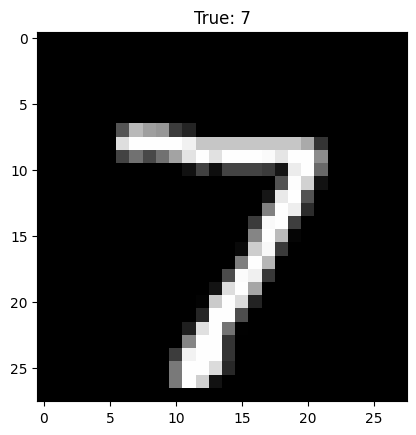

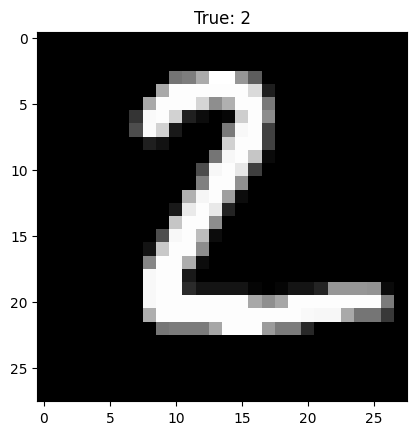

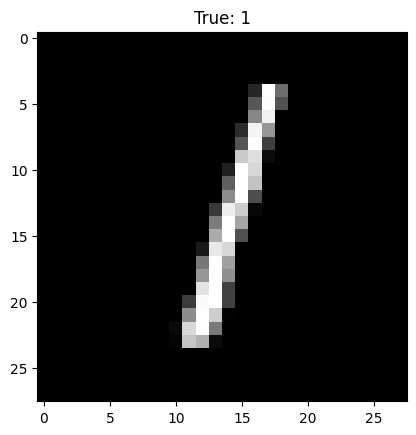

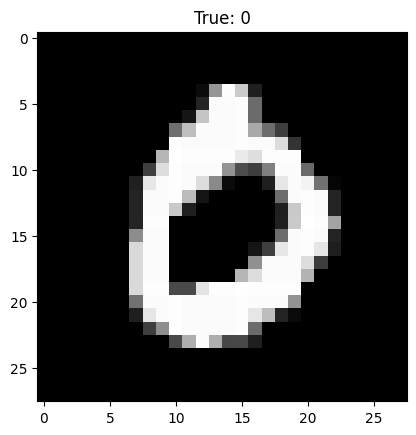

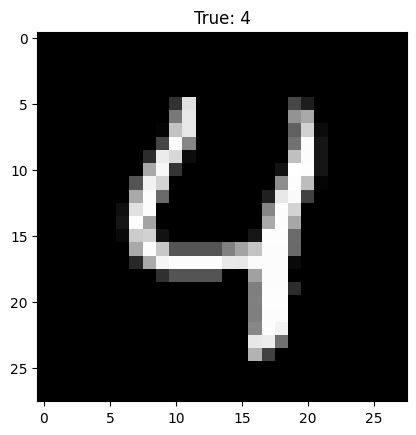

In [23]:
# the prediction with CNN
predictions = cnn_model.predict(x_test_cnn)
for i in range (5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {np.argmax(predictions[i])}")
    plt.show()


   